## Import the required libraries

In [367]:
# To show the graphs in the same window.
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; 

# Use seaborn plotting defaults
sns.set()

## Working with Perfectly Linear Dataset

In [370]:
# Generate the dataset that has linear data

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
# Returns two values, one X >>> co-ordinates (x,y), and second y >>> label, which depends on centers value.
# n_samples >>> Total number of data points to generaate >>> The values will be in X with coordinates (x,y)
# centers = The number of cluster centers to generate >>> The values will be in y with labels for each variety.
# cluster_std = The standard deviation of the clusters, controlling how spread out the data points are around the centers
# random_state =  A seed for the random number generator, ensuring reproducibility of the generated data

X[:,0] # All rows in col1 - which has x co-ordinates.
# To get x co-ordinates
X[:2,1] # First two rows in col2 - which has y co-ordinates.
# [Rows,Columns]
# To get y co-ordinates

array([1.5303347, 1.6311307])

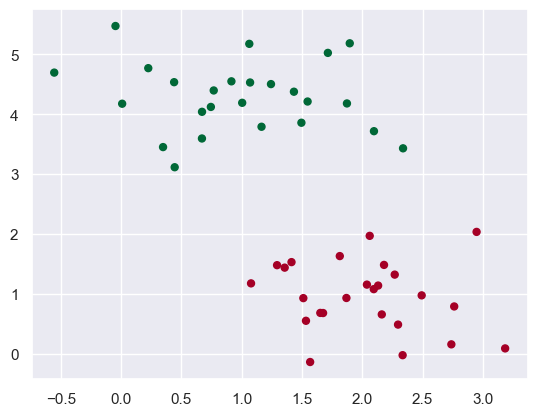

In [372]:
# Plot the scatterplot with the generated datapoints

plt.scatter(X[:, 0], X[:, 1],  c=y, cmap='RdYlGn_r', s=25)

# plt.scatter(x, y, s=None, c=None, *, cmap=None)
# x = X[:, 0] > x co-ordinates
# y = X[:,1] > y co-ordinates
# c = different color indicator = y which has values 0,1 for each label >>> Gives different color for different label. But cannot decide color type.
# cmap = 'scatter' >>> Related to color, decides the color type.
# s = The marker size of the points.

plt.show()

### Create a SVM model to generate a linear decision line to diffentiate the linear data.

In [375]:
# Import SVM Library
from sklearn.svm import SVC # "Support vector classifier"

SVC_Obj = SVC(kernel='linear', C=1)
SVC_Obj.fit(X, y)

SVC(C=1, kernel='linear')

#### Check the attributes of SVC Class

In [378]:
SVC_Obj.C
# 1
SVC_Obj.kernel
# Linear
SVC_Obj.degree
# 3
SVC_Obj.gamma
# scale
SVC_Obj.support_
#array([18, 25,  7])
SVC_Obj.support_vectors_
# Considers only 3 co-ordinates (points) as support vectors.
# array([[0.44359863, 3.11530945],       [2.33812285, 3.43116792],       [2.06156753, 1.96918596]])

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

#### Some important attributes of matplotlib function.

### Draw the scatter plot along with decision boundary
- The graph should include
- 1. All data points
  2. decision boundary ( π ),
  3. +ve support vector ( +ve π ) and
  4. -ve support vector ( -ve π )

In [382]:
# This function draws the decision boundary ( π ), +ve support vector ( +ve π ) and -ve support vector ( -ve π )

def plot_svc_decision_function(SVC_Obj, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate SVC_Obj
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = SVC_Obj.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(SVC_Obj.support_vectors_[:, 0],
                   SVC_Obj.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolors='g');
        plt.show()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

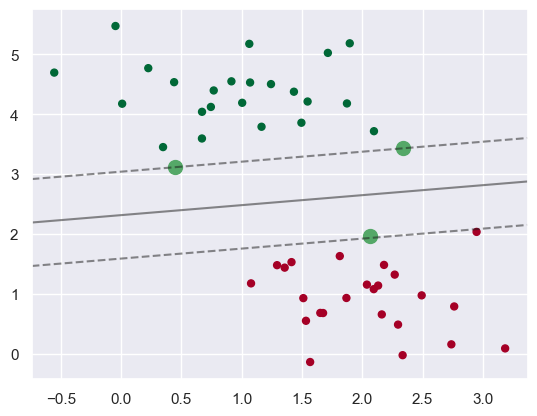

In [384]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='RdYlGn_r')
plot_svc_decision_function(SVC_Obj);

## The importance of Support Vectors

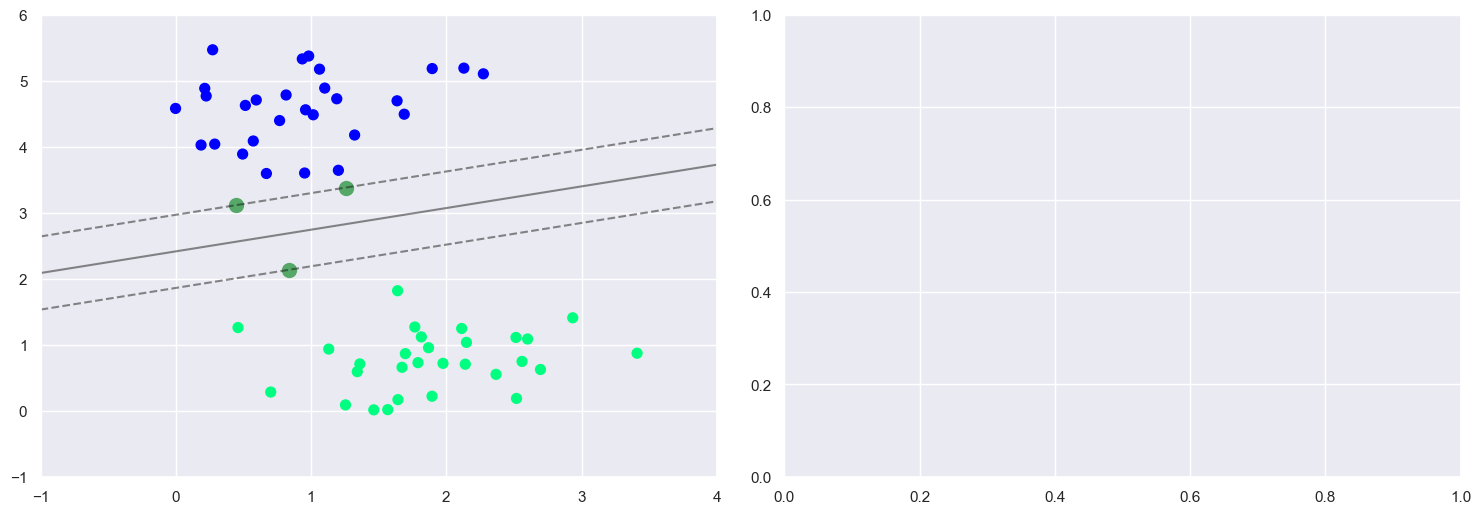

In [387]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Working with Almost Linearly Separable Dataset

In [390]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

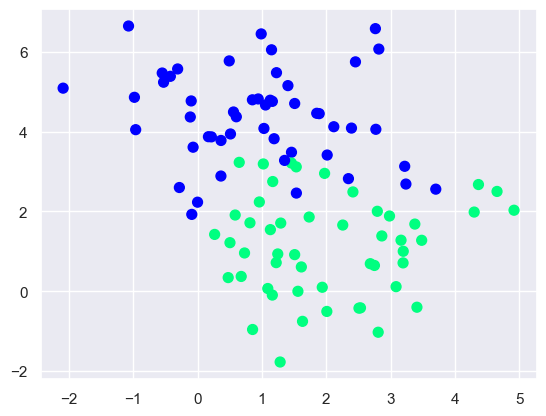

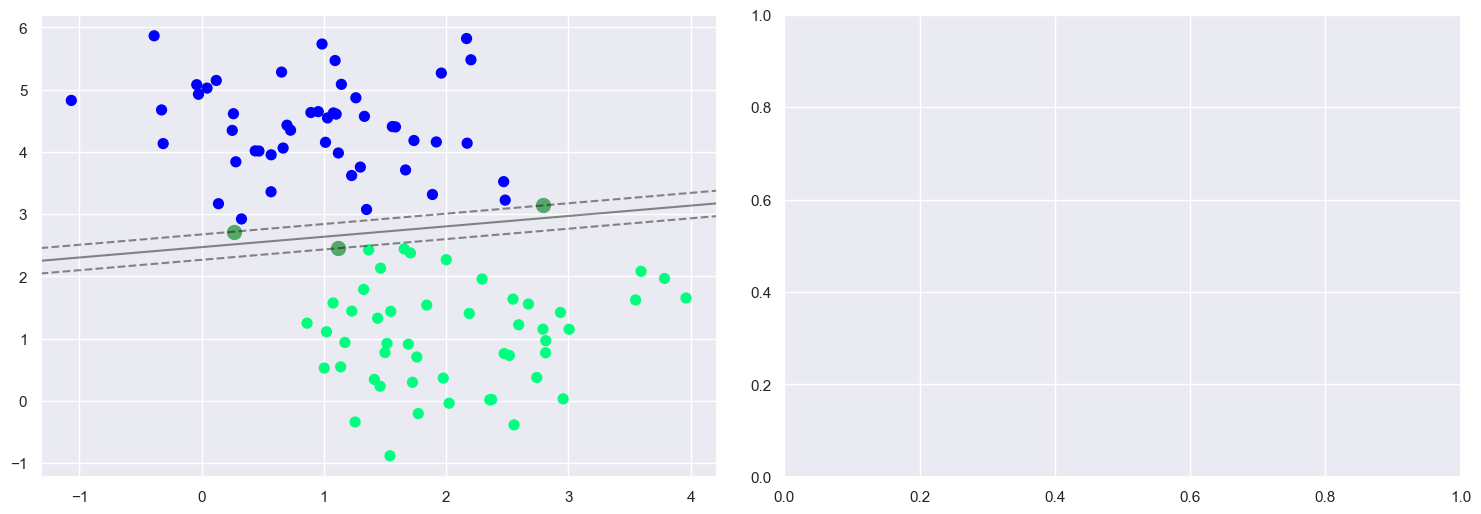

In [392]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)